# 3.2 Задача. О выстреле из пушки

## Задача
Установленная на горе пушка стреляет под углом к горизонту. С помощью интервальной съемки получили траекторию движения снаряда. В таблице приведены его координаты, отснятые в некоторые моменты времени. 
```
x, м:  18.6, 99.9,  157.2, 219.9, 303.7, 399.6, 452.5, 528.4, 613.8, 669.7,  750.6, 816.2, 906.2
h, м:  85.7, 173.8, 196.7, 259.6, 332.5, 379.3, 414.2, 419.7, 461.3, 438.9,  447.8, 434.1, 441.4
```
Определить:

1. На какой высоте установлена пушка ?
2. Попадет ли снаряд в мишень, если ее центр расположен в точке x = 1450  метров на высоте h = 51 метр, а радиус мишени - 50 см?

Показать траекторию движения снаряда на графике.

In [1]:
import numpy as np

# Сформируем массивы координат движения снаряда:
x_array = np.array([18.6, 99.9, 157.2, 219.9, 303.7, 399.6, 452.5, 528.4, 613.8, 669.7, 750.6, 816.2, 906.2])
h_array = np.array([85.7, 173.8, 196.7, 259.6, 332.5, 379.3, 414.2, 419.7, 461.3, 438.9, 447.8, 434.1, 441.4])

# Построим траекторию движения снаряда, используя в качестве линии тренда полином второй степени. Найдем его коэффициенты:

a = np.polyfit(x_array, h_array, 2)
a

array([-7.55031968e-04,  1.08639341e+00,  6.35317385e+01])

In [2]:
def get_trend(x, a):
    """для вычисления значений полинома второй степени в точке x"""
    y = a[0] * x **2 + a[1]* x + a[2]
    return y

In [3]:
# вычислим высоту, на которой находилась пушка. Значение координаты по оси ОХ в этой точке равно 0.

h_zero = get_trend(0, a)

print("Высота, на которой стоит пушка: %6.2f м" % h_zero)

Высота, на которой стоит пушка:  63.53 м


In [4]:
# Вычислим, на какой высоте будет находиться снаряд в точке по оси ОХ, где расположена мишень

x_target = 1450
h_target = get_trend(x_target, a)

print("Высота, в точке %4d м: %6.2f м" % (x_target, h_target))

Высота, в точке 1450 м:  51.35 м


In [5]:
# Определим, попадет ли снаряд в цель, 
# если известно что мишень расположена на высоте 51 метр, учитывая, что радиус мишени 50 см = 0.5 м. 
# Для этого найдем модуль разности между высотой, на которой расположена мишень, и положением снаряда, 
# вычисленного с помощью линии тренда. Затем сравним полученное значение с радиусом мишени и выведем результат.

delta_h = abs(51 - h_target)

if delta_h <= 0.5:
    print("Снаряд попадет в мишень.")
else:
    print("Снаряд не попадет в мишень.")

Снаряд попадет в мишень.


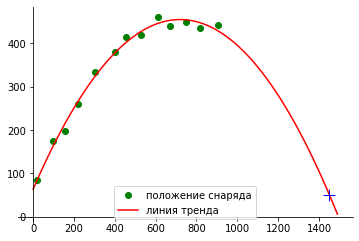

In [12]:
import matplotlib.pyplot as plt

# Создадим списки, необходимые для построения линии тренда:

x_trend = [i for i in range(0,1500,10)]
y_trend = [get_trend(x, a) for x in x_trend]

plt.plot(x_array, h_array, 'go', label="положение снаряда")
plt.plot(x_trend, y_trend, 'r-', label="линия тренда")
plt.plot(x_target, h_target, 'b+', markersize=12)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(loc="lower center")
plt.show()

## Задача
Даны точки на плоскости, координаты которых занесены в массивы `x_array` и `y_array`. Постройте по этим точкам наиболее подходящий тренд: линейный (полином первой степени)  или квадратичный (полином второй степени). Для этого для каждого типа тренда:

* найдите коэффициенты полинома;
* сформируйте массив значений, посчитанных по формуле тренда в точках  x_array;
* вычислите среднюю ошибку между известными значениями y_array и посчитанными с помощью формулы тренда (начала посчитать относительную погрешность между координатой  точки по оси ОУ и значением тренда в этой точке, потом найти среднее значение погрешности). 
* Далее необходимо сравнить среднюю погрешность двух трендов и вывести коэффициенты тренда  с наименьшей средней ошибкой. Если ошибки одинаковы, то выводить коэффициенты полинома второй степени.

**Входные данные:**

* строка, в которой через пробел заданы координаты точек по оси OX (вещественные числа);
* строка, в которой через пробел заданы координаты точек по оси OY (вещественные числа).

**Выходные данные:**

* коэффициенты полинома, описывающего линию тренда.

Для вывода коэффициентов используйте форматный вывод:
```
"%5.3f %5.3f"
```
или
```
"%5.3f %5.3f %5.3f"
```
___

**Sample Input 1:**
```
-8.9 -8.5 -8.0 -7.1 -6.8 -6.1 -5.6 -5.5 -5.2 -5.2 -5.2 -4.2 -4.1 -3.5
-1.4 -1.2 -1.1 -0.9 -0.8 -0.6 -0.5 -0.4 -0.3 -0.3 -0.3 -0.1 0.1 0.1
```
**Sample Output 1:**
```
0.282 1.141
```
___

**Sample Input 2:**
```
2.7 2.8 3.3 4.2 4.4 4.8 5.1 7.1 7.4 7.5
4.5 4.6 4.7 5.0 5.1 5.2 5.3 6.0 6.1 6.2
```
**Sample Output 2:**
```
0.007 0.268 3.756
```
___

**Sample Input 3:**
```
-0.8 0.2 0.3 0.6 0.6 0.8 1.0 1.3 1.3 1.5 2.3 2.5 2.9 2.9 3.2 4.2 4.2
6.2 2.1 1.8 1.1 1.1 0.7 0.3 0.1 0.1 -0.1 0.2 0.5 1.3 1.3 2.1 6.2 6.2
```
**Sample Output 3:**
```
1.012 -3.443 2.788
```

In [70]:
import numpy as np

get_trend = lambda x, a, n: sum([a[i]*x**(n-i-1) for i in range(n)])

# x_array = np.array(input().split(), dtype = float)
# y_array = np.array(input().split(), dtype = float)

x_array = np.array('-8.9 -8.5 -8.0 -7.1 -6.8 -6.1 -5.6 -5.5 -5.2 -5.2 -5.2 -4.2 -4.1 -3.5'.split(), dtype = float)
y_array = np.array('-1.4 -1.2 -1.1 -0.9 -0.8 -0.6 -0.5 -0.4 -0.3 -0.3 -0.3 -0.1 0.1 0.1'.split(), dtype = float)
n = 2

coeff = []
avg = []
for i in range(1,n+1):
    
    # fit model
    c = np.polyfit(x_array, y_array, i)
    y_model = get_trend(x_array, c, i)
    
    # error
    d = abs((y_model - y_array) / y_array)
    
    coeff.append(c)
    avg.append(np.average(d))
    
print(*[f"{x:5.3f}" for x in coeff[avg.index(min(avg))]])

0.282 1.141
